La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp1` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Application à l'étude des ultrasons. (1h)
On reprend l'étude de la propagation des ultrasons. Le but est de déterminer la célérité du son dans l'air. 
Le protocole réalisé et le matériel utilisé est celui proposé dans l'[exercice que vous avez fait précédemment](exo_protocole).

## Réalisation du protocole et estimation des incertitudes-type
Cette partie sera réalisée en TP. Lisez-là pour savoir ce que vous devrez faire mais vous ne pourrez pas faire grand chose avant le TP (sauf précision).

### Mise en place
Le protocole à réaliser est affichable en cliquant sur la croix à droite.

````{toggle}
```{figure} ./images/atelierscientifique_v2.png
:name: at_scient
:align: center
Titre
```
1. Réaliser le montage en n'oubliant pas d'alimenter l'émetteur et de le régler et en branchant les deux récepteurs sur la console FOXY. Régler l'émetteur en mode salves courtes.
2. __Brancher un connecteur BNC-fil simple entre l'émetteur et FOXY.__ Ce signal est le signal alimentant l'émetteur (_pas le signal émis_). Il servira à synchroniser l'affichage.
2. Brancher la console FOXY à l'ordinateur. Une "tablette" simulée s'ouvre. __Choisir généraliste.__
3. Préparer l'acquisition (`Affichage > Acquisition` _Conseil : décocher l'option "Fermer au lancement de l'acquisition" pour garder cette fenêtre de réglage durant le TP_):
    * Choisir les voies à acquérir (_icone rouge et noir à droite du [mini-graphique](at_scient)_)
        1. Les placer (glisser-déplacer) sur l'axe des ordonnées du petit graphique.
        2. Les nommer clairement (onglet `Grandeur` sous le petit graphique quand vous sélectionner la voie choisie)
        3. Choisir le calibre de chaque voie (le signal ne dépassera pas 10V).
    * Régler la base de temps de l'acquisition
        1. Choisir d'acquérir en fonction du temps ([Horloge](at_scient) à placer sur l'axe des abscisses)
        2. Régler la durée d'acquisition (dans `Fonction du temps` quand vous sélectionnez l'horloge) comme choisi dans [l'étude préliminaire](exemple_proto).
        3. Régler le nombre de points à 10000 (on apprendra plus tard à réfléchir à ce choix).
        4. Cocher `Acquisition continue` de manière à ne pas avoir besoin de relancer l'acquisition à chaque fois.
    * Régler la synchronisation : il faut choisir à quelle valeur démarrera l'affichage des signaux pour observer un signal stable.
        1. Dans l'onglet (Menus de l'horloge) `Synchronisation` choisir la `Voie de synchro` correspondant au signal de l'émetteur.
        2. Choisir une `Niveau` de 1(V) `Croissant`.
    * Vous pouvez maintenant lancer l'acquisition !

````

### Réalisation des mesures - Bilan des incertitudes

Vous devez maintenant réaliser la mesure.

```{attention}
Au préalable, vous avez dû discuter au préalable avec le reste du groupe pour vous répartir les distances de mesure de sorte que chaque élève fasse une mesure de temps de vol pour une distance différente.
```

Rendre compte :
* des résultats de mesurage
* des différentes sources d'incertitude avec leur estimation si elles sont non négligeables

## Combinaison des incertitudes. Simulation de Monte-Carlo.

Vous allez devoir :
1. Ecrire une série d'instructions qui simule le tirage de chaque sources d'incertitudes N fois (N = 1000000)
2. Combiner ces sources d'incertitudes pour obtenir les distributions des grandeurs $t_1, t_2, d_1$
 et $d_2$
4. Estimer l'incertitude-type sur chaque grandeur et le résultat de mesurage pour chaque grandeur.
3. Représenter graphiquement les histogrammes des distributions pour les 4 grandeurs. Commenter leur allure

Compléter la cellule de code ci-dessous et exécutez là.

t1 =  34
t2 =  0
d1 =  0
d2 =  0
u(t1) =  0.18248832734476522
u(t2) =  0
u(d1) =  0
u(d2) =  0


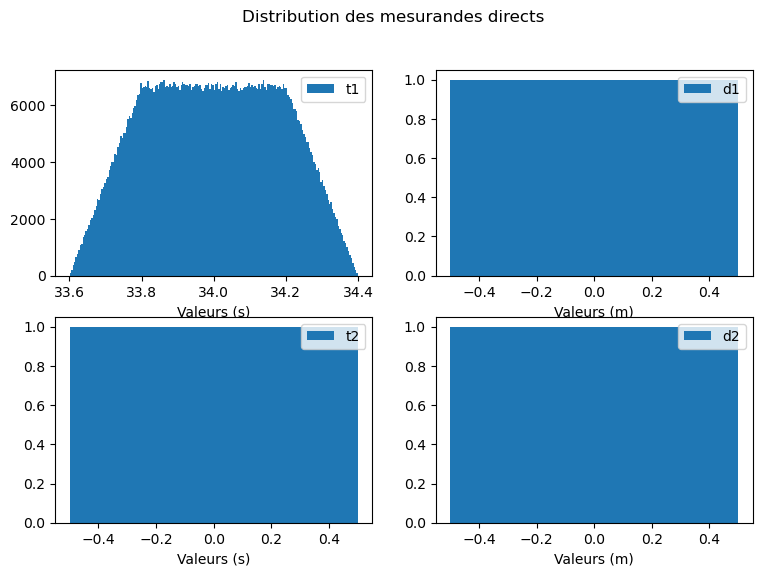

In [1]:
import matplotlib.pyplot as plt
"""
Vous devez commencer par importer les bibliothèques utiles :
- numpy (manipulation de vecteurs de valeurs)
- numpy.random (simulation de tirages aléatoires)
- matplotlib.pyplot (tracés graphiques)

Pour cette première fois, nous le faisons pour vous. Faites attention aux alias.
"""
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


"""
Créer maintenant, pour chaque source d'incertitude un vecteur de taille N simulant chaque sources d'incertitudes.
On rappelle :
- qu'il faut centrer les distributions sur 0. Vous ajouterez ensuite le résultat de mesurage.
- pour une distribution normale d'espérance m et d'écart-type s, la fonction à utiliser est rd.normal(m, s, N)
- pour une distribution uniforme entre a et b, la fonction à utiliser est rd.uniform(a, b, N)
ATTENTION : Le "rd" ne fonctionne que parce que (vous) avez importé la bibliothèque numpy.random avec l'alias "rd".

On a mis un exemple pour t1 en supposant deux sources d'incertitudes.

Chez vous, simulez un nombre de sources d'incertitude faible 
pour chaque mesurande avec des valeurs arbitraires (mais pas trop!).
Vous pourrez ainsi tester le reste de votre script.

Il faudra bien sûr modifier cette partie en TP.

Enregistrer les valeurs mesurées dans des variables t1_m, t2_m, d1_m et d2_m
"""
N = 1000000  # Nombre de simulations
t1_m = 34  # Valeur mesurée pour t1
t2_m = 0  # Valeur mesurée pour t2
d1_m = 0  # Valeur mesurée pour d1
d2_m = 0  # Valeur mesurée pour d2

# t1 --- 
"""
S'il y a moins de sources d'incertitude, supprimez en.
S'il y a plus de sources d'incertitude, ajoutez en en vous aidant du modèle.
"""
t1_u1u = 0.3  # Ecart-type de la première source d'incertitude de t1
t1_u2u = 0.1  # Ecart-type de la deuxième source d'incertitude de t1
t1_u1 = rd.uniform(-t1_u1u, t1_u1u, N)  # Distribution uniforme
t1_u2 = rd.uniform(-t1_u2u, t1_u2u, N)  # Distribution uniforme

# t2 ---

# d1 ---

# d2 ---

"""
Déterminer la distribution statistique pour t1, t2, d1 et d2.
On oubliera pas d'ajouter le résultat de mesurage pour centrer ces grandeurs sur leur valeur mesurée.

Exemple de code :
t1_sim = t1_m + ut11 + ut12
si t1_m est le résultat de mesurage et ut11, ut12 les vecteurs simulés
ATTENTION : Ne PAS changer les noms des variables t1_sim...
car elles seront utilisées pour le tracés des histogrammes.

On donne à nouveau l'exemple pour t1
"""
t1_sim = t1_m + t1_u1 + t1_u2
t2_sim = 0
d1_sim = 0
d2_sim = 0




"""
Déterminer l'incertitude-type pour chaque mesurande t1, t2, d1 et d2
On rappelle la fonction std(X, ddof=1) qui calculer l'écart-type des éléments du vecteur X.
ATTENTION, cette fonction fait partie de la bibliothèque numpy
Pour l'affichage :
Enregistrer les incertitude-type dans des variables t1_u, t2_u, d1_u et d2_u.
"""
t1_u = np.std(t1_sim, ddof=1)  # Ecart-type pour les échantillons simulés contenus dans t1_sim
t2_u = 0
d1_u = 0
d2_u = 0


"""
Les lignes ci-dessous vous donneront les résultats des estimations des incertitudes-type de mesures.
ATTENTION : Les chiffres significatifs ne sont pas bons, à vous d'arrondir.
"""
print("t1 = ", t1_m)
print("t2 = ", t2_m)
print("d1 = ", d1_m)
print("d2 = ", d2_m)
print("u(t1) = ", t1_u)
print("u(t2) = ", t2_u)
print("u(d1) = ", d1_u)
print("u(d2) = ", d2_u)


"""Tracé graphique
Les instructions sont données. Vous verrez ainsi comment tracer 4 graphiques 
dans une même fenêtre.
A FAIRE : Pensez à changer l'unité des valeurs (légende de l'axe des abscisses suivant vos mesures).
"""

f, axs = plt.subplots(2, 2, figsize=(9,6), dpi=100)  # Création d'une fenêtre graphique avec 4 axes répartis sur 2 colonnes et 2 lignes.
f.suptitle("Distribution des mesurandes directs")  # Titre global
"""
axs est un tableau contenant les 4 axes (=graphiques)

"""

# Tracé de t1
axs[0][0].hist(t1_sim, bins='rice', label="t1")
axs[0][0].set_xlabel("Valeurs (s)")  # Légende de l'axe des abscisses
axs[0][0].legend()  # Affichage de la légende (pour savoir que c'est t1)

axs[1][0].hist(t2_sim, bins='rice', label="t2")
axs[1][0].set_xlabel("Valeurs (s)")  # Légende de l'axe des abscisses
axs[1][0].legend()

axs[0][1].hist(d1_sim, bins='rice', label="d1")
axs[0][1].set_xlabel("Valeurs (m)")  # Légende de l'axe des abscisses
axs[0][1].legend()

axs[1][1].hist(d2_sim, bins='rice', label="d2")
axs[1][1].set_xlabel("Valeurs (m)")  # Légende de l'axe des abscisses
axs[1][1].legend()

plt.show()

Pour analyser correctement les valeurs des mesurandes directs et leur incertitudes on va les afficher correctement, ce qui implique :
- de choisir où tronquer l'incertitude de mesure. On prendra l'habitude de ne garder que __2 chiffres significatifs sur l'incertitude-type__.
- de tronquer le résultat de mesurage en cohérence : sa précision (puissance de 10 du dernier chiffre affiché) doit être la même que l'incertitude-type.

Grâce aux valeurs affichés précédemment, rendre-compte dans votre compte-rendu de la mesure de $t_1, t_2, d_1$ et $d_2$ en choisissant correctement l'arrondi de l'incertitude-type et de la valeur mesurée. __On oubliera pas non plus l'unité.__

Forme à donner :

$$t_1 = ... \pm ...\rm{Unité}$$
$$t_2 = ... \pm ...\rm{Unité}$$
$$d_1 = ... \pm ...\rm{Unité}$$
$$d_2 = ... \pm ...\rm{Unité}$$

## Estimation de la célérité du son. Propagation d'incertitude.

### Votre travail

Vous devez utiliser les résultats précédents pour obtenir une estimation de la célérité du son et de son incertitude de mesure.

Il n'est pas utile de refaire toute la simulation. Vous disposez déjà de N échantillons simulés pour $t_1,t_2, d_1, d_2$ (`t1_sim, t2_sim, d1_sim, d2_sim`). Vous allez devoir:
1. Créer deux vecteurs `dt_sim` et `D_sim` correspondent aux N simulations de tirages pour la durée de vol et la distance E-R
2. Créer un vecteur `c_sim` contenant les N simulations des valeurs de la célérité du son
3. Obtenir la moyenne `cm` et l'écart-type `uc` du vecteur `c_sim`.
4. Tracer l'histogramme des valeurs simulés de la célérité `c`.

### A vous de coder
Une bonne partie du code est déjà donnée. Compléter les relations utiles.

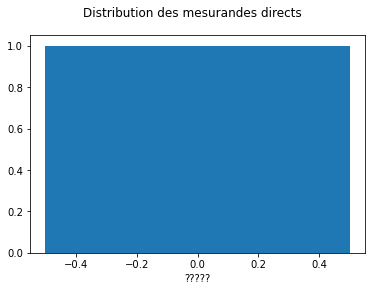

c =  0
uc =  0


In [2]:
"""
Il n'est pas nécessaire de réimporter les bibliothèques puisque vous les avez déjà importés.
Modifier les formules lorsque c'et nécessaire.
"""
dt_sim = t2_sim - t1_sim  # Simulation des temps de vol
D_sim = 0  # Simulation des distances

c_sim = 0  # Simulation des célérités

cm = 0  # Utiliser la cellule précédente pour calculer la moyenne de la célérité à partir de c_sim
uc = 0  # Utiliser la cellule précédente pour calculer l'incertitude sur la célérité à partir de c_sim

"""
Tracé graphique
Pensez bien à légender les axes
"""
f, axs = plt.subplots()  # Création d'une fenêtre graphique avec 4 axes répartis sur 2 colonnes et 2 lignes.
f.suptitle("Distribution des mesurandes directs")  # Titre global
axs.set_xlabel("?????")  # Légende de l'axe des abscisses

# Tracé de t1
axs.hist(c_sim, bins='rice')
plt.show()

"""
Les lignes ci-dessous afficheront les résultats sans tenir compte des chiffres significatifs
attention aux noms de variables
"""
print("c = ", cm)
print("uc = ", uc)

### Rendez-compte de votre mesure
L'affichage précédent n'est pas acceptable car :
* il affiche trop de chiffres
* il ne donne pas l'unité.

__Un résultat de mesure unique avec incertitude doit s'écrire sous la forme :__
$$
G = (G_{mes} \pm u(G)) \rm{Unités}
$$

Vous devez respectez les contraintes suivantes :
* L'incertitude de mesure doit avoir 2 chiffres significatifs
* La valeur mesure doit avoir la même précision que l'incertitude ne mesure.

Rendre-compte de votre résultat de mesure.

$$
c = (Resultat de mesurage \pm Incertitude) (Facultatif: \times Puissance de 10) \rm{Unité}
$$

## Données théoriques
D'après la littérature, la célérité du son dépend de la température et peut être approximée par la fonction :

$$
c_{air} = 331,5 + 0,607 \theta
$$

autour de la température ambiante où $\theta$ est la température en __Celsius__.

_(Robert N. Compton et Michael A. Duncan, Laser Experiments for Chemistry and Physics)_

> 1. Ecrire une fonction `cel_T(T)` qui prend comme argument un flottant (température T) et qui renvoie un flottant : la célérité(en m/s)
> 2. Calculer l'écart normalisé entre la célérité estimée par votre mesure et celle donnée par la littérature (par manque d'information, on considèrera que cette valeur n'a pas d'incertitude (incertitude nulle)). Conclure quant à la compatibilité entre votre expérience et le modèle proposé.

In [3]:
def cel_T(T):
    """Fonction renvoie la célérité pour une température T"""
    return True

"""Calculer l'écart normalisé."""
en = 0

print(en)

0


````{important} 
Que ce soit ici en codant sous Python ou par écrit en analysant un ensemble de résultats ou une courbe, l'exploitation n'est JAMAIS automatique et demande TOUJOURS de réfléchir en détail à vos résultats.
````